# Autoimpute 使用示範

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# autoimpute imports - utilities & visuals
from autoimpute.utils import md_pattern, proportions
from autoimpute.visuals import plot_md_locations, plot_md_percent
from autoimpute.visuals import plot_imp_dists, plot_imp_boxplots
from autoimpute.visuals import plot_imp_swarm, plot_imp_strip
from autoimpute.visuals import plot_imp_scatter

# autoimpute imports - imputations & analysis
from autoimpute.imputations import MultipleImputer
from autoimpute.analysis import MiLinearRegression
import warnings
warnings.filterwarnings("ignore")

train_path = '/Users/robert/Documents/ML_dataset/titanic/train.csv'

df = pd.read_csv(train_path)

df.shape


(891, 12)

MultipleImputer(return_list=True, seed=101, strategy='mean')


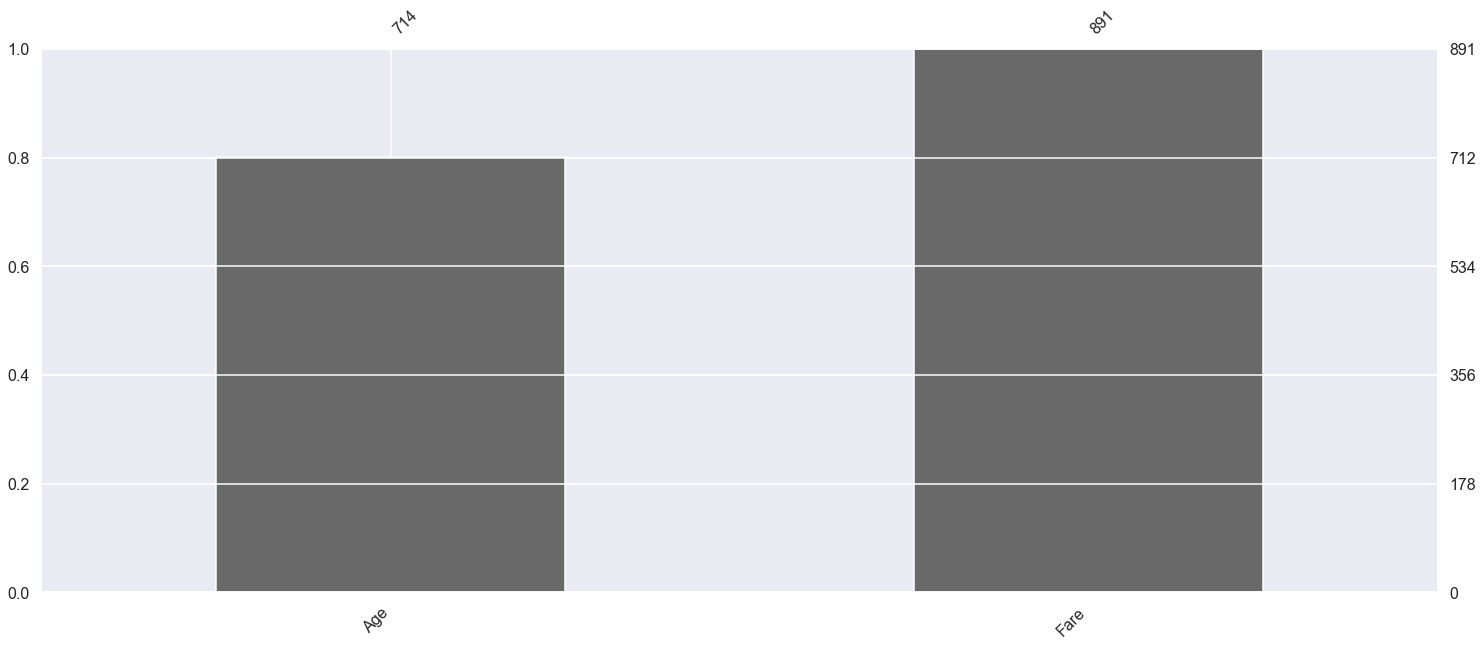

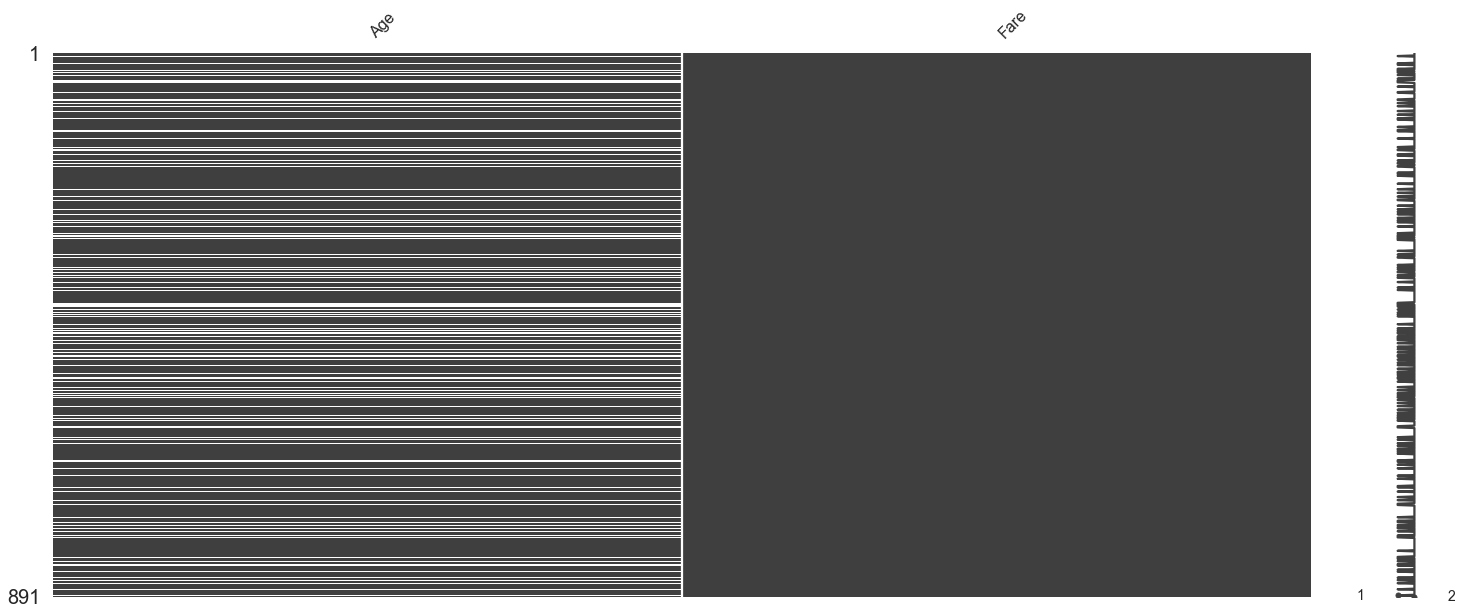

In [2]:
pre_df = df[['Age','Fare']]
plot_md_percent(pre_df)
plot_md_locations(pre_df)

mi_mean_mar = MultipleImputer(
    strategy="mean", n=5, return_list=True, seed=101
)

# print the mean imputer to console
print(mi_mean_mar)

# perform mean imputation procedure
imp_mean_mar = mi_mean_mar.fit_transform(pre_df)


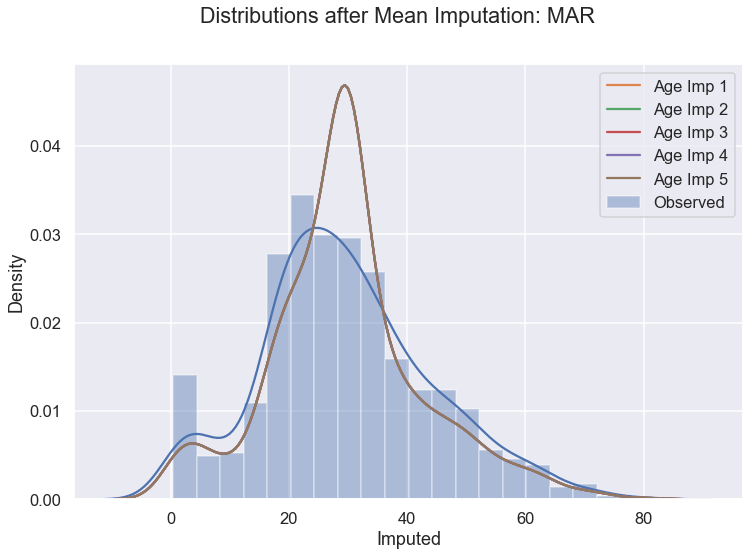

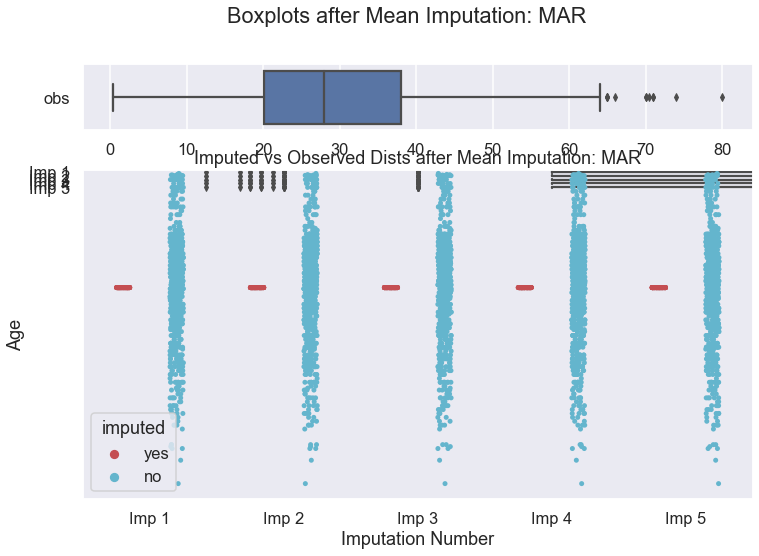

In [3]:

# distribution plot for mean imputation
plot_imp_dists(
    d=imp_mean_mar,
    mi=mi_mean_mar, 
    imp_col="Age",
    title="Distributions after Mean Imputation: MAR",
    separate_observed=False,
    hist_observed=True,
    hist_imputed=False
)

plot_imp_boxplots(
    d=imp_mean_mar,
    mi=mi_mean_mar,
    imp_col="Age",
    title="Boxplots after Mean Imputation: MAR"
)

plot_imp_strip(
    d=imp_mean_mar,
    mi=mi_mean_mar,
    imp_col="Age",
    title="Imputed vs Observed Dists after Mean Imputation: MAR"
)


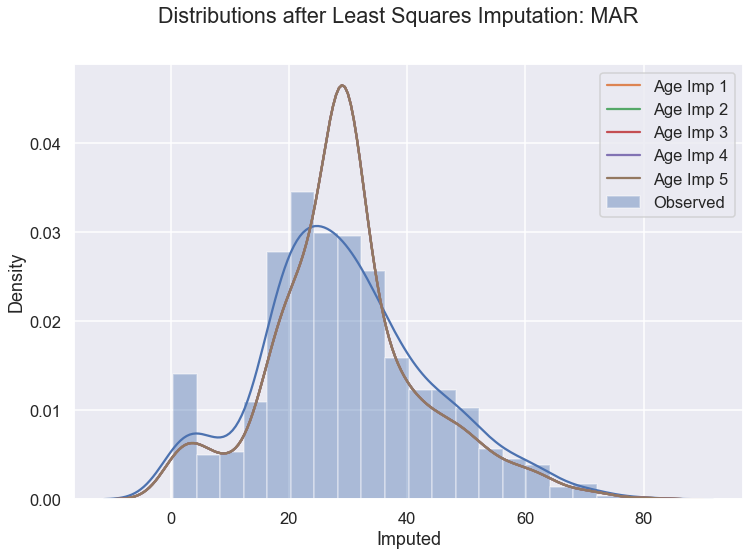

In [4]:

mi_ls_mar = MultipleImputer(
    strategy="least squares", n=5, return_list=True, seed=101
)

# perform least squares imputation procedure
imp_ls_mar = mi_ls_mar.fit_transform(pre_df)

# distribution plot for least squares imputation
plot_imp_dists(
    d=imp_ls_mar,
    mi=mi_ls_mar, 
    imp_col="Age",
    title="Distributions after Least Squares Imputation: MAR",
    separate_observed=False,
    hist_observed=True,
    hist_imputed=False
)




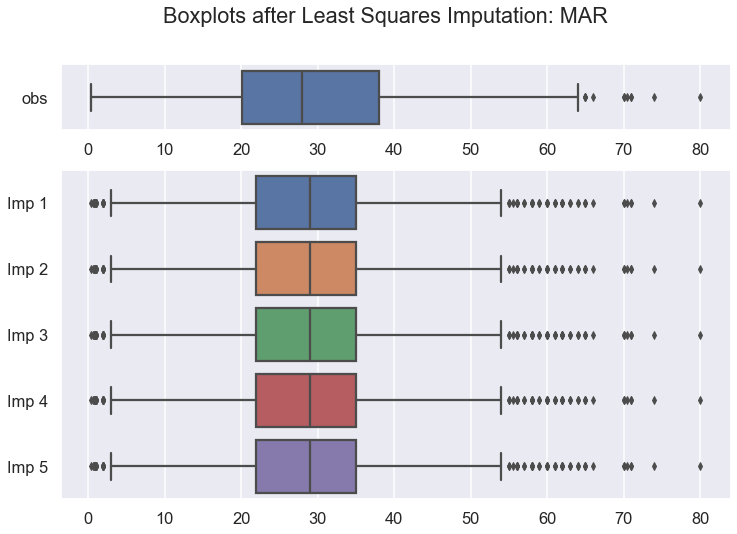

In [8]:

# box plot for least squares imputation
plot_imp_boxplots(
    d=imp_ls_mar,
    mi=mi_ls_mar,
    imp_col="Age",
    title="Boxplots after Least Squares Imputation: MAR"
)




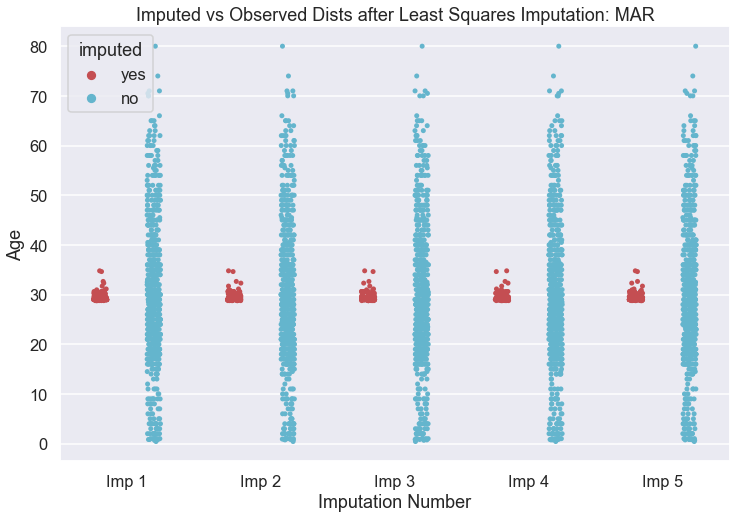

In [5]:

# strip plot for least squares imputation
plot_imp_strip(
    d=imp_ls_mar,
    mi=mi_ls_mar,
    imp_col="Age",
    title="Imputed vs Observed Dists after Least Squares Imputation: MAR"
)



In [6]:
# create the PMM imputer
mi_pmm_mar = MultipleImputer(
    strategy="pmm", n=5, return_list=True, seed=101
)

# perform PMM imputation procedure
imp_pmm_mar = mi_pmm_mar.fit_transform(pre_df)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 16 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.


In [ ]:
# distribution plot for PMM imputation
plot_imp_dists(
    d=imp_pmm_mar,
    mi=mi_pmm_mar, 
    imp_col="Age",
    title="Distributions after PMM Imputation: MAR",
    separate_observed=False,
    hist_observed=True,
    hist_imputed=False
)

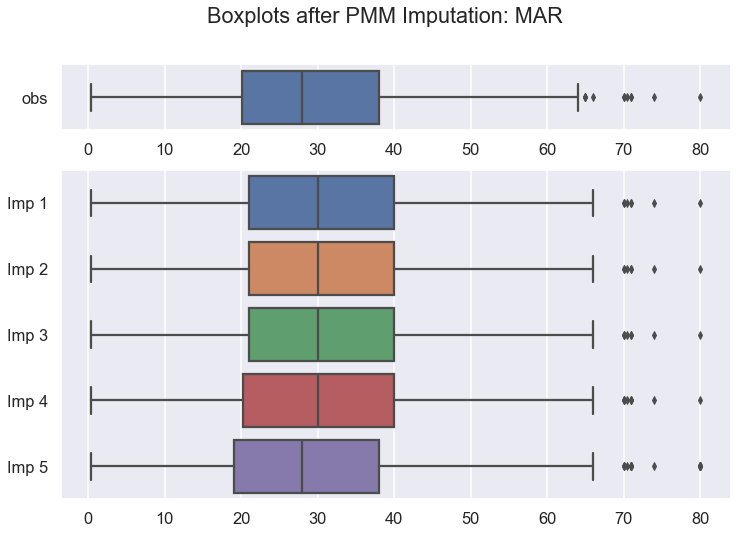

In [15]:
# box plot for PMM imputation
plot_imp_boxplots(
    d=imp_pmm_mar,
    mi=mi_pmm_mar,
    imp_col="Age",
    title="Boxplots after PMM Imputation: MAR"
)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.1% of the points

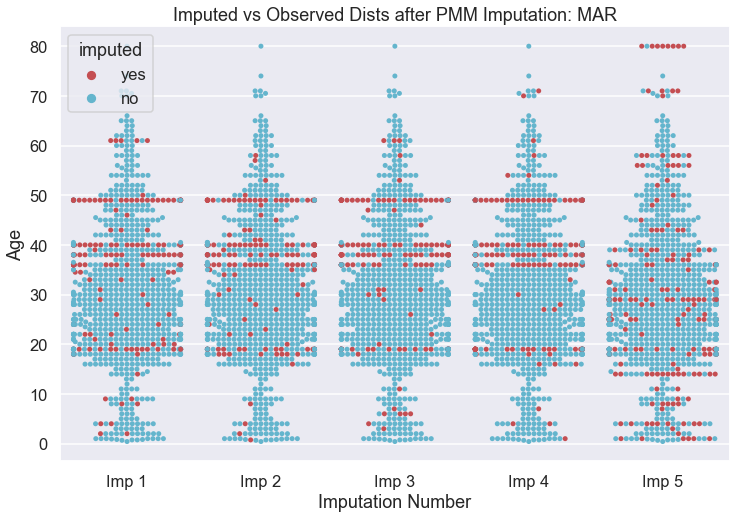

In [16]:
# swarm plot for PMM imputation
plot_imp_swarm(
    d=imp_pmm_mar,
    mi=mi_pmm_mar,
    imp_col="Age",
    title="Imputed vs Observed Dists after PMM Imputation: MAR"
)

In [27]:
imp_pmm_mar[4][1].isnull().any()

Age     False
Fare    False
dtype: bool